#  Тема 3

# Вариант 16

## Задача 1(4.2)

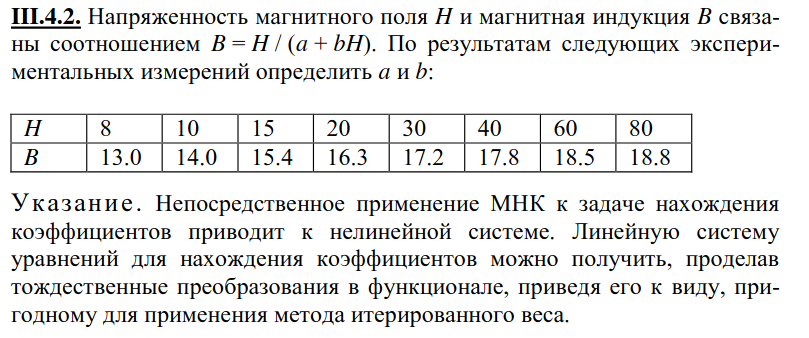

Первое, что хочется сделать --- перевернуть уравнение, чтобы оно стало линейным, т.е.

$$ \dfrac{1}{B} = \dfrac{a}{H} + b $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [16]:
H = np.array([8.0,10.0,15.0,20.0,30.0,40.0,60.0,80.0])
B = np.array([13.0, 14.0, 15.4, 16.3, 17.2, 17.8, 18.5, 18.8])

print("Новый вектор H^{-1} " + "\n\n" + (str(list(H**(-1)))))
print("\n\n")
print("Новый вектор B^{-1} " + "\n\n" + (str(list(B**(-1)))))

Новый вектор H^{-1} 

[0.125, 0.1, 0.06666666666666667, 0.05, 0.03333333333333333, 0.025, 0.016666666666666666, 0.0125]



Новый вектор B^{-1} 

[0.07692307692307693, 0.07142857142857142, 0.06493506493506493, 0.06134969325153374, 0.05813953488372093, 0.056179775280898875, 0.05405405405405406, 0.05319148936170213]


Применим метод МНК к новой задаче: 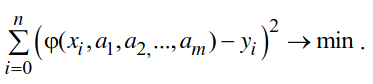

Где $\phi$ -- линейная функция.

Записав это условие в виде обнуления производной получаем 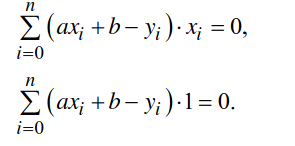

Откуда решение 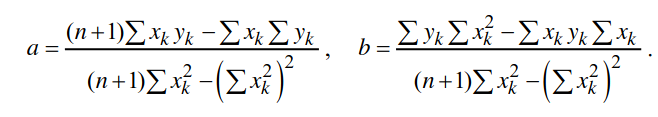

In [33]:
x = H**(-1)
y = B**(-1)
n = H.shape[0]

a = ((n+1)*(x*y).sum() - x.sum() * y.sum()) / ((n+1)* (x**2).sum() - (x**2).sum()**2)

print("a = " + str(a))

b = (y.sum() * (x**2).sum() - (x*y).sum() * x.sum()) / ((n+1) * (x**2).sum() - (x**2).sum()**2)

print("b = " + str(b))

a = 0.15608954372853123
b = 0.015299282129745533


## Задача 2(*)

Рассмотрим уравнение $x^n = 1$, множество его корней -- $ \Big\{ \exp \left( \dfrac{i 2 \pi k}{N} \right) \Big\}_{k=0}^{N-1}$. По формуле Виета для уравнение понятно, что 
$$ \sum_{k=0}^{N-1} \exp \left( \dfrac{i 2 \pi k}{N} \right) = 0 $$

Откуда сразу следует доказываемое равенство для $L = 1$ и любого $\phi$, т.е.

$$ \sum_{k=0}^{N-1} \exp \left( \dfrac{i 2 \pi k}{N}  + i \phi \right) = \exp( i \phi ) \sum_{k=0}^{N-1} \exp \left( \dfrac{i 2 \pi k}{N} \right) = 0 $$ 

Для $L \neq N$ тоже всё ясно, т.к. $L = n_1 N + n_2, ~ n_2 < N$  $\Rightarrow$
$$\exp \left( \dfrac{i 2 \pi k L}{N} \right) = \exp \left( i 2 \pi k n_1 + \dfrac{i 2 \pi k n_2}{N} \right) = \exp \left(\dfrac{i 2 \pi k n_2}{N} \right) \Rightarrow$$
$$\Rightarrow  \sum_{k=0}^{N-1} \exp \left( \dfrac{i 2 \pi k n_1}{N} \right) =  \sum_{k=n_1}^{N-1 +n_1} \exp \left( \dfrac{i 2 \pi k}{N} \right) = \Big\{ В~ силу ~периодичности~ слагаемых~ суммы \Big\} =  \sum_{k=0}^{N-1} \exp \left( \dfrac{i 2 \pi k}{N} \right) = 0$$

Собирая всё вместе получаем требуемое утверждение.

Мнимый и действительный аналоги утверждения: 
$$\sum_{k=0}^{N-1} \sin \left( \dfrac{2 \pi k}{N}  +\phi \right) = \sum_{k=0}^{N-1} \cos \left( \dfrac{2 \pi k}{N}  +\phi \right)= 0$$


## Задача 3(4.5)

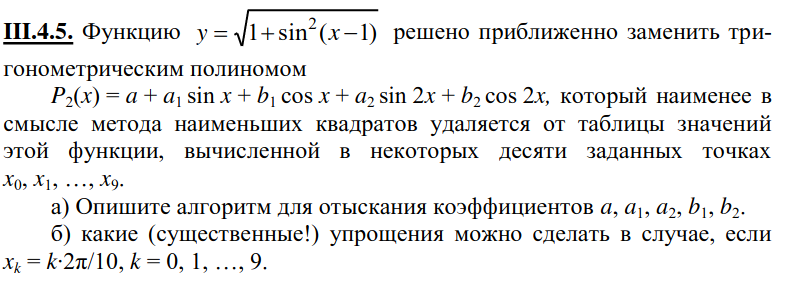

а)  Нужно минимизировать функционал МНК:
$$\sum_{k=0}^9 \left(a + a_1\sin(x_k) + b_1\cos(x_k) + a_2\sin(2 x_k) + b_2\cos(2 x_k) - \sqrt{1 + \sin^2(x_k-1)} \right)^2 \rightarrow \min $$

Дифференцируя по параметрам получим систему уравнений на $a, a_1, a_2, b_1, b_2$.

Т.е. к решению системы:

$$\sum_{k=0}^9 \left(a + a_1\sin(x_k) + b_1\cos(x_k) + a_2\sin(2 x_k) + b_2\cos(2 x_k) - \sqrt{1 + \sin^2(x_k-1)} \right) = 0 $$


$$\sum_{k=0}^9 \left(a + a_1\sin(x_k) + b_1\cos(x_k) + a_2\sin(2 x_k) + b_2\cos(2 x_k) - \sqrt{1 + \sin^2(x_k-1)} \right) \sin(x_k) = 0 $$

$$\sum_{k=0}^9 \left(a + a_1\sin(x_k) + b_1\cos(x_k) + a_2\sin(2 x_k) + b_2\cos(2 x_k) - \sqrt{1 + \sin^2(x_k-1)} \right) \cos(x_k) = 0 $$

$$\sum_{k=0}^9 \left(a + a_1\sin(x_k) + b_1\cos(x_k) + a_2\sin(2 x_k) + b_2\cos(2 x_k) - \sqrt{1 + \sin^2(x_k-1)} \right) \sin(2 x_k) = 0 $$

$$\sum_{k=0}^9 \left(a + a_1\sin(x_k) + b_1\cos(x_k) + a_2\sin(2 x_k) + b_2\cos(2 x_k) - \sqrt{1 + \sin^2(x_k-1)} \right) \cos(2 x_k) = 0 $$


б) Используя результат задачи 2(\*): 
$$\sum_{k=0}^{N-1} \sin \left( \dfrac{2 \pi k}{N}  +\phi \right) = \sum_{k=0}^{N-1} \cos \left( \dfrac{2 \pi k}{N}  +\phi \right)= 0$$
Можно раскрыть сумму квадратов в выражении из первого пункта и успростить их с помощью формул понижения степени и избавляясь от произведения тригонометрических функций с помощью формулы суммы косинусов(синусов):
$$\sum_{k=0}^9 \cos(x_k) \sin(x_k) = \dfrac{1}{2} \sum_{k=0}^9 \sin(2 x_k) = \sum_{k=0}^9 \cos(2 x_k) = 0$$
$$$$
$$\sum_{k=0}^9 \cos(2x_k) \sin(x_k) = \sum_{k=0}^9 \cos(x_k) \sin(2x_k) = \sum_{k=0}^9 \cos(x_k) \cos(x_k) = \sum_{k=0}^9 \sin(2x_k) \sin(x_k) = 0$$

$$ \sum_{k=0}^9 \sin^2(x_k) =  \sum_{k=0}^9 \cos^2(x_k)  = \sum_{k=0}^9 \cos^2(2 x_k) = \sum_{k=0}^9 \sin^2(2x_k) = 5$$

Получаем новый функционал для минимизации:
$$\sum_{k=0}^9 \sqrt{1 + \sin^2(x_k-1)}^2   -\sum_{k=0}^9 \left( (a + a_1\sin(x_k) + b_1\cos(x_k) + a_2\sin(2 x_k) + b_2\cos(2 x_k)) \sqrt{1 + \sin^2(x_k-1)}\right) + 5(a^2 + a_1^2+a_2^2+b_1^2+b_2^2)   \rightarrow \min $$

Т.е. дифференцируя по параметрам и приравнивая производные нулю получим
$$10 a = \sum_{k=0}^9 \sqrt{1 + \sin^2(x_k-1)} $$
$$10 a_1 = \sum_{k=0}^9 \sin(x_k) \sqrt{1 + \sin^2(x_k-1)} $$
$$10 b_1 = \sum_{k=0}^9 \cos(x_k) \sqrt{1 + \sin^2(x_k-1)} $$
$$10 a_2 = \sum_{k=0}^9 \sin(2 x_k) \sqrt{1 + \sin^2(x_k-1)} $$
$$10 b_2 = \sum_{k=0}^9 \cos(2 x_k) \sqrt{1 + \sin^2(x_k-1)} $$


Что не только сильно упрощает задачу, но и позволяет решить её.

## Задача 4(\*\*)

Многочлен Чебышева $T_n(x)$ определяется как $T_n(\cos t) = \cos (nt)$. Его нули из этой формулы:
$$\cos (n t) = 0 \Rightarrow n t_k = \dfrac{\pi}{2} + \pi k \Rightarrow x_k = \cos \left(\pi \dfrac{1+2k}{2 n} \right), ~~ k\in \overline{\{0, n-1 \}  }$$
Пусть $m,l < n$, тогда

$$\sum_{k=1}^n T_l(x_k)T_m(x_k) = \sum_{k=1}^n \cos \left( \dfrac{(\pi + 2 \pi k) l}{2n} \right) \cos \left( \dfrac{(\pi + 2 \pi k) m}{2n} \right) = \dfrac{1}{2} \sum_{k=1}^n \left( \cos \left( \dfrac{(\pi + 2 \pi k)( l+m)}{2n} \right) +\cos \left( \dfrac{(\pi + 2 \pi k)( l-m)}{2n} \right) \right)$$

Так как l+m$\neq$2n, то по следствию из \* сумма первых слагаемых ноль(если l$\neq$m), аналогично со вторым слагаемым, получается, что сумма не равна нулю, только когда l=m $\Rightarrow$ 
$$\sum_{k=1}^n T_l(x_k)T_m(x_k) = \dfrac{n}{2} \delta_{lm}$$

## Задача 5(4.6)

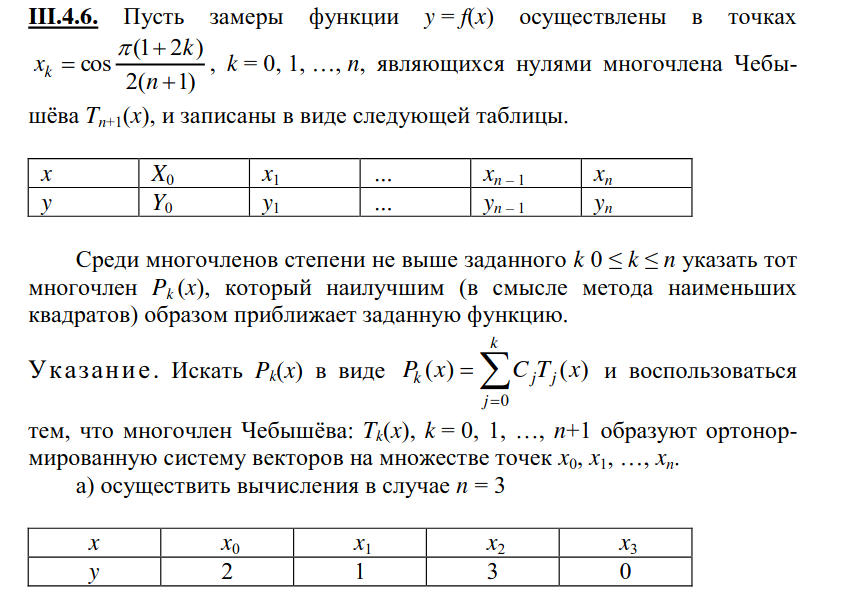

Геометрический МНК осуществляет ортогональную проекцию исходной функции на некоторое подпространство, в данном случае используя тот факт, что в нашем конечномерном пространстве с нормой равной сумме значений функции в точках $x_i$ есть базис в виде многочленов Чебышева. Следовательно найти коэффиценты в разложении его по первым k базисным элементам очень просто:
$$ C_i = \sum_{k=0}^{n} y_k T_i(x_k)$$

a) $T_0(x) = 1, ~T_1(x) = x, ~ T_2(x) = 2 x^2-1, ~ T_3(x) = 4 x^3-3x, ~ T_4(x) = 8 x^4-8 x^2+1$


Нули $T_4(x)$ равны $x_0 = -0.92388, ~ x_1 =-0.382683 ,~ x_2 =0.382683 , ~ x_3 = 0.92388$

И того(c учетом того, что $||T_j||^2 =\dfrac{n+1}{2}$[т.е. они не нормированы])

$$C_0 = \dfrac{2}{n+1}\sum_{k=0}^{n} y_k T_0(x_k) = 3$$
$$C_1 = \dfrac{2}{n+1}\sum_{k=0}^{n} y_k T_1(x_k) = -0.541195$$
$$C_2 = \dfrac{2}{n+1}\sum_{k=0}^{n} y_k T_2(x_k) = -0.707105$$
$$C_3 = \dfrac{2}{n+1}\sum_{k=0}^{n} y_k T_3(x_k) = -1.306565$$

## Задача 6(5.11б)

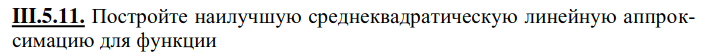
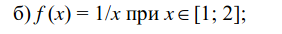

In [6]:
x = np.linspace(1,2,10000) # Создание сетки
y = x**(-1) # значение признака на сетке

x = np.array([x, np.ones(len(x))]).T #Добавление константного признака

mod = sm.OLS(y, x)
res = mod.fit()

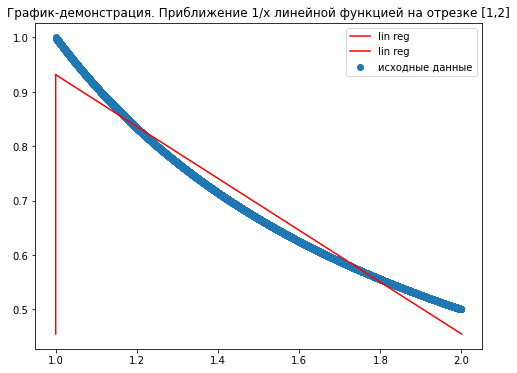

In [7]:
plt.figure(figsize=(8, 6))

y_pred = res.predict(x)

plt.plot(x, y_pred, label='lin reg', c='red')

plt.scatter(np.linspace(1,2,10000),y, label='исходные данные')

plt.legend()
plt.title('График-демонстрация. Приближение 1/x линейной функцией на отрезке [1,2]')

plt.show()

In [114]:
print("Ответ: " +str(res.params[0]) + ' x ' + '+ ' + str(res.params[1]))

Ответ: -0.4766562556199302 x + 1.4081372498968467


Коэффиценты также можно посчитать и с помощью $L_2$ нормы. Возьмем за базисные функции $\phi_1 = x$, $\phi_2 = 1$
$$(\phi_1,\phi_0) = (\phi_0,\phi_1) = \int_1^2 x dx = \dfrac{3}{2}$$
$$(\phi_1,\phi_1) = \int_1^2 x^2 dx = \dfrac{7}{3}$$
$$(\phi_0,\phi_0) = \int_1^2 1 dx = 1$$
$$(\phi_0,1/x) = \int_1^2 1/x dx = \ln(2)$$
$$(\phi_1,1/x) = \int_1^2 1 dx = 1$$

$$\begin{pmatrix}
  1&  \dfrac{3}{2}\\
   \dfrac{3}{2}& \dfrac{7}{3}
\end{pmatrix} \begin{pmatrix} a \\ b\end{pmatrix} = \begin{pmatrix} \ln(2) \\ 1\end{pmatrix}$$
от куда $a = 1.40812$, $b = -0.476649$. Таким образом результаты совпадают:

$$F(x) = -0.476649 x + 1.40812$$

## Задача 6(5.12ав)

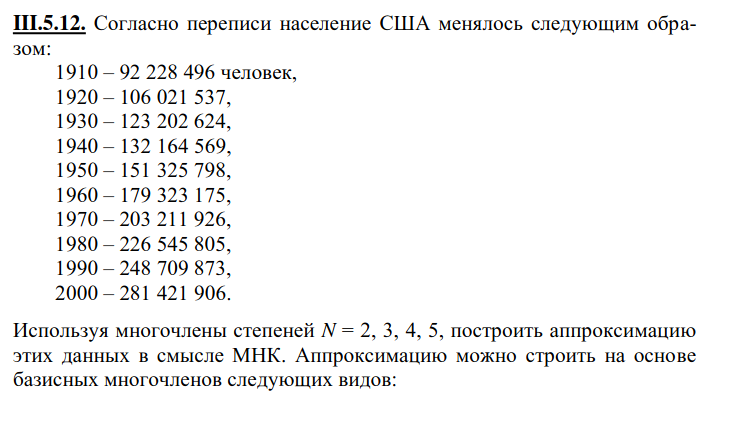
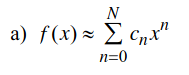
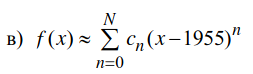

In [4]:
df = pd.DataFrame()
df['x'] = list(np.arange(1910.0,2010.0,10))
df['y'] = 1.0*np.array([92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906])

df

,x,y
0,1910.0,92228496.0
1,1920.0,106021537.0
2,1930.0,123202624.0
3,1940.0,132164569.0
4,1950.0,151325798.0
5,1960.0,179323175.0
6,1970.0,203211926.0
7,1980.0,226545805.0
8,1990.0,248709873.0
9,2000.0,281421906.0


In [34]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()

**Пункт а**

Создадим класс линейной регрессии.

In [5]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred)**2).sum() / len(y_true)

In [6]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self, degree=2):
        self.degree = degree
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
          
        X_tmp = []
        for i in range(self.degree+1):
            X_tmp.append(X**i)
        
        X_tmp = np.array(X_tmp).T 
            
        self.n, self.d = X_tmp.shape
        self.theta = np.linalg.inv(X_tmp.T@X_tmp)@X_tmp.T@Y
             
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        
        X_tmp = []
        for i in range(self.degree+1):
            X_tmp.append(X**i)
        
        X_tmp = np.array(X_tmp).T 
        
        y_pred = X_tmp.dot(self.theta)
        return y_pred
    
    def coef_(self):
        return self.theta[:]

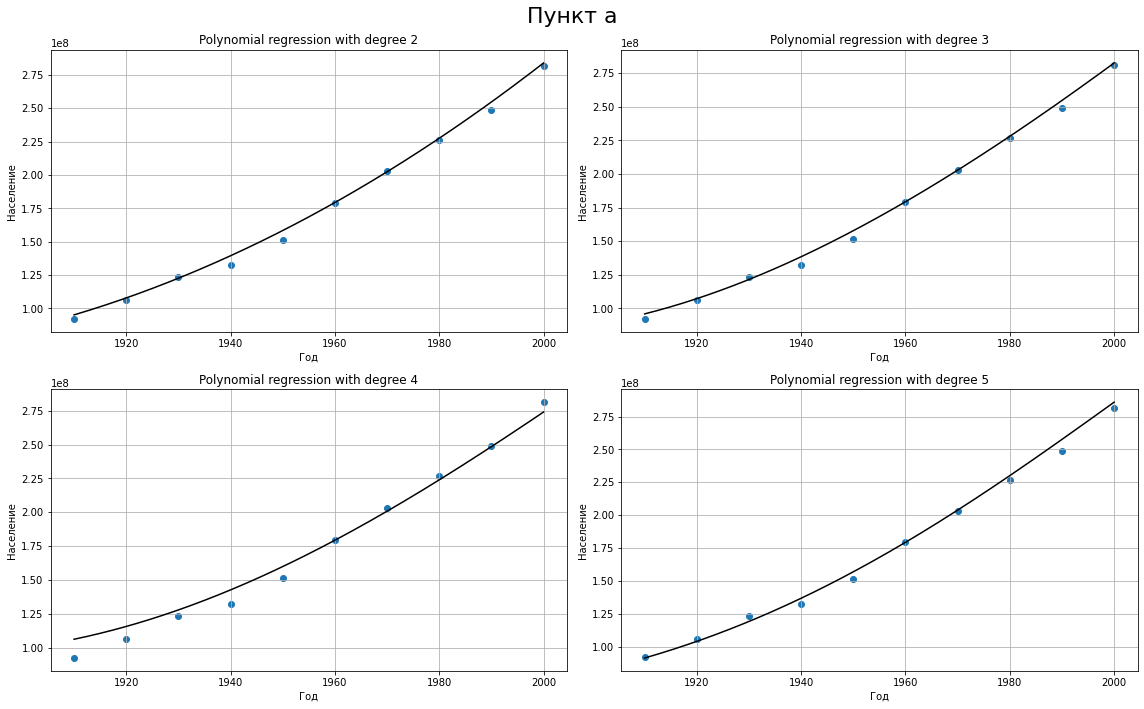

In [7]:
fig = plt.figure(figsize=(16, 10))

X = df['x'].to_numpy()
y = df['y'].to_numpy()

X_seq = np.linspace(X.min(),X.max(),300)

report_mse_a = []

for degree in [2, 3, 4, 5]:
    plt.subplot(2, 2, degree - 1)
    
    mod = MyLinearRegression(degree)
    
    mod = mod.fit(X,y.reshape(-1,1))
    
    plt.scatter(X,y)
    plt.plot(X_seq, mod.predict(X_seq)+179323175-mod.predict(1960),color="black")
    plt.title("Polynomial regression with degree "+str(degree))
    plt.grid()
    plt.xlabel('Год')
    plt.ylabel('Население')
    report_mse_a.append(mean_squared_error(mod.predict(X),y.reshape(-1,1)))

    
fig.suptitle('Пункт а', fontsize=22)
plt.tight_layout()

In [98]:
for i in range(4):
    print('MSE, степень многочлена ' + str(i+2) + ' =  ' + str(report_mse_a[i]))

MSE, степень многочлена 2 =  8492342497323.475
MSE, степень многочлена 3 =  7994444986115.542
MSE, степень многочлена 4 =  500373294799350.1
MSE, степень многочлена 5 =  2392336635623334.0


**Пункт б**

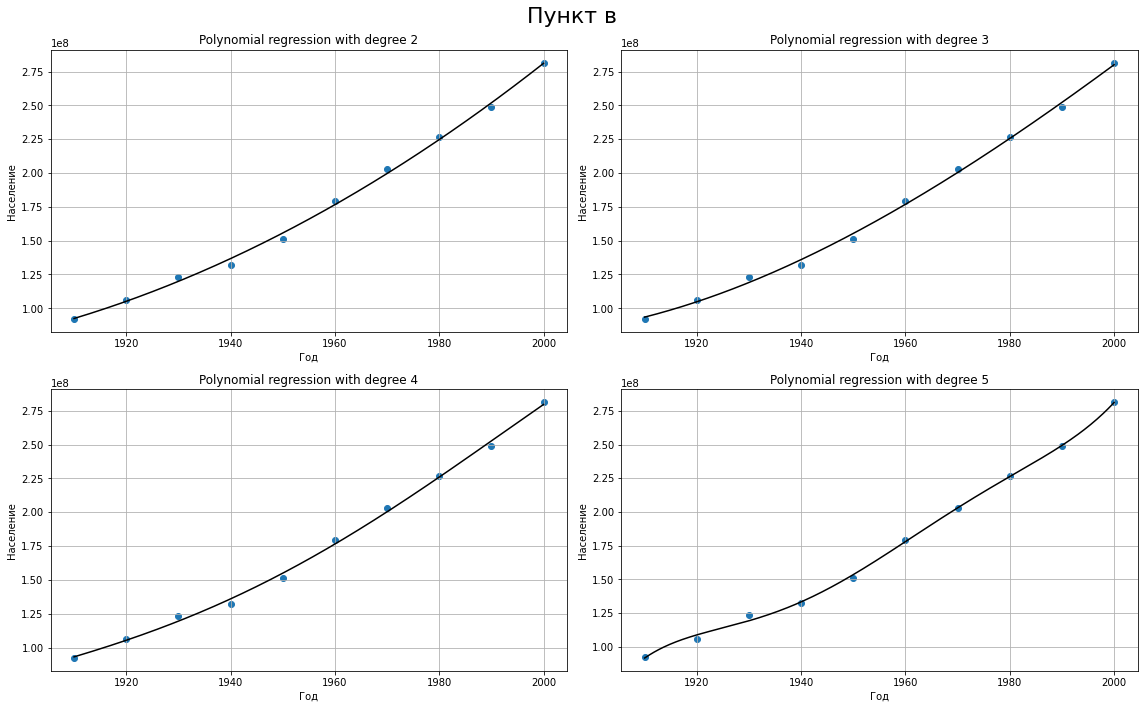

In [99]:
fig = plt.figure(figsize=(16, 10))

y = df['y'].to_numpy()

X = (df['x'].to_numpy()-1955)
X_seq = np.linspace(X.min(),X.max(),300)

report_mse_b = []

for degree in [2, 3, 4, 5]:
    plt.subplot(2, 2, degree - 1)
    
    mod = MyLinearRegression(degree)
    
    mod = mod.fit(X,y.reshape(-1,1))
    
    X_seq_tr = np.linspace(df['x'].to_numpy().reshape(-1,1).min(),df['x'].to_numpy().reshape(-1,1).max(),300)
    
    plt.scatter(X+1955,y)
    plt.plot(X_seq_tr , mod.predict(X_seq) ,color="black")
    plt.title("Polynomial regression with degree "+str(degree))
    plt.grid()
    plt.xlabel('Год')
    plt.ylabel('Население')
    report_mse_b.append(mean_squared_error(mod.predict(X),y.reshape(-1,1)))

    
fig.suptitle('Пункт в', fontsize=22)
plt.tight_layout()

In [100]:
for i in range(4):
    print('MSE, степень многочлена ' + str(i+2) + ' =  ' + str(report_mse_b[i]))

MSE, степень многочлена 2 =  8492342497317.979
MSE, степень многочлена 3 =  7993123089052.403
MSE, степень многочлена 4 =  7839445817787.325
MSE, степень многочлена 5 =  3193093720638.616


In [101]:
for i in range(4):
    print('Модуль разности \'пункта b-a\' MSE при степень многочлена ' + str(i+2) + ' =  ' + str(report_mse_b[i] - report_mse_a[i]))

Модуль разности 'пункта b-a' MSE при степень многочлена 2 =  -5.49609375
Модуль разности 'пункта b-a' MSE при степень многочлена 3 =  -1321897063.1386719
Модуль разности 'пункта b-a' MSE при степень многочлена 4 =  -492533848981562.8
Модуль разности 'пункта b-a' MSE при степень многочлена 5 =  -2389143541902695.5


Как видим второй способ гораздо лучше первого. Попробуем понять почему. Для этого посмотрим на числа обусловленности обращаемых матриц для последней степени полинома $X^TX$.

In [136]:
X_a = []
for i in range(5+1):
    X_a.append(x**i)
    
X_a = np.array(X_a).T
X_a_a = X_a.T@X_a
print('Число обусловленности матрицы в первом пункте: ' + str(np.linalg.cond(X_a_a, p=2) ))

Число обусловленности матрицы в первом пункте: 1.7345340295330163e+37


In [137]:
X_b = []
for i in range(5+1):
    X_b.append(((x-1955)**i))
    
X_b = np.array(X_b).T
X_b_b = X_b.T@X_b
print('Число обусловленности матрицы в первом пункте: ' + str(np.linalg.cond(X_b_b, p=2)))

Число обусловленности матрицы в первом пункте: 2.7332075394110424e+16


Как видим числа обусловленности отличаются на 21 порядок! Это делает огромный вклад в погрешность при обращении матрицы. 